# Init

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta

from utility.helpers import *
import utility.init as util

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slowe

In [ ]:
emr_df = pd.read_csv(util.emr_infection_data)
de_ref_df = pd.read_csv(util.de_reference_data)
nl_ref_df = pd.read_csv(util.nl_reference_data)
be_ref_df = pd.read_csv(util.be_reference_data)

# add date typ columns
emr_df = addDateTypeColumn(emr_df,'XDate')
de_ref_df = addDateTypeColumn(de_ref_df,'XDate')
nl_ref_df = addDateTypeColumn(nl_ref_df,'XDate')
be_ref_df = addDateTypeColumn(be_ref_df,'XDate')

# Inhabitants - Pie

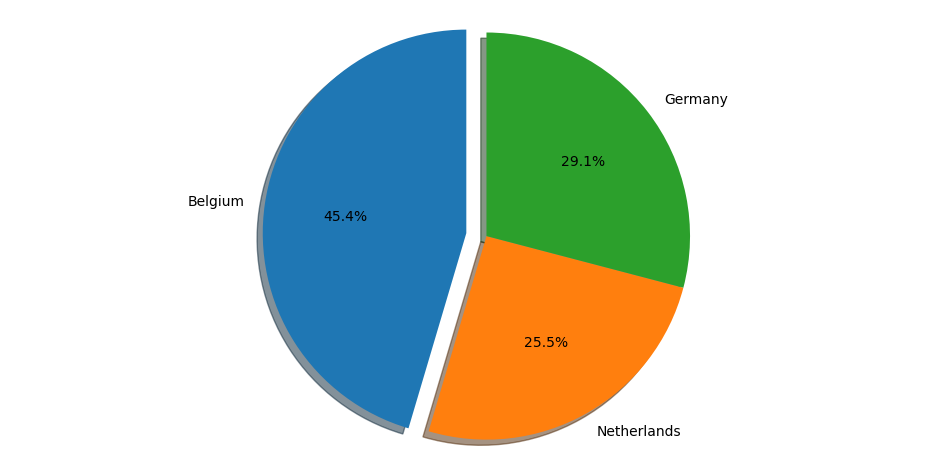

In [2]:
province_df = pd.DataFrame(util.province_size.items(), columns=['Id','Inhabitants'])
province_df['Label'] = util.class_labels.values()
province_df['Explode'] = 0
province_df.loc[province_df['Id'] == 10 ,'Explode'] = 0.1

province_df = province_df.loc[province_df['Id'].isin({10,20,30})]

explode = tuple(list(province_df['Explode']))  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(province_df['Inhabitants'], explode=explode, labels=province_df['Label'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig1.set_facecolor('white')
plt.show()

# Sketch

In [ ]:
# sketchGraph(emr_df, {30}, refDf=de_ref_df, streakLabel='German off days', offDayStreak=True, offDayFactor=True)

# sketchGraph(emr_df, {30}, nl_ref_df, 'Dutch off days')

# sketchGraph(emr_df, {30}, be_ref_df, 'Belgian off days')

# sketchGraph(emr_df, {20}, be_ref_df, 'Dutch off days')

# sketchGraph(emr_df, {10}, be_ref_df, 'Belgian off days')

# sketchGraph(emr_df, {40}, legDf=de_ref_df, legLabel='German off days')
# sketchGraph(emr_df, {40})

# Scatter

In [ ]:
def addToMatrixPlot(df, ax, id, ref_df):
    x = df.loc[df['Province_Id']== id, 'XDate']
    y = df.loc[df['Province_Id']== id, 'N_Day_Rate_Change_Sliding_Window']
    ax.plot(x, y, color=util.class_colors[id])
    addDayOffStreaksToAx(ref_df, ax)
    ax.set_ylabel(util.class_labels[id])


fig, axs = plt.subplots(4,3, sharex=True, sharey=True)

for id in range(0,4):
    addToMatrixPlot(emr_df, axs[id, 0], (id+1)*10, be_ref_df)
    addToMatrixPlot(emr_df, axs[id, 1], (id+1)*10, nl_ref_df)
    addToMatrixPlot(emr_df, axs[id, 2], (id+1)*10, de_ref_df)

axs[3, 2].set_xlabel("German off-days")
axs[3, 1].set_xlabel("Dutch off-days")
axs[3, 0].set_xlabel("Belgian off-days")

#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    show = True
    for label in ax.xaxis.get_ticklabels():
        # label is a Text instance
        label.set_rotation(45)
        if not show:
            label.set_visible(False)
            show = True
        else:
            show = False

fig.suptitle(str(util.incident_window_size)+"-day infection rate change (sliding window) for " + util.timeframe_start + " - " + util.timeframe_end)
plt.show()